In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [38]:
df = pd.read_excel('C://Users//Dell//OneDrive//Desktop//Harvesting//HFN Portal.xlsx')

In [39]:
df.head()

,Order,Buyer Name,PinCode,Crop Name,Qty,Crop ID,Created Date
0,NaN,NaN,NaN,NaN,NaN,NaN,NaT
1,230614.0,Monika Khatri,160055.0,Carrot,1.0,2856.0,2021-05-09
2,230561.0,Lovely walia,160071.0,Mango,2.0,2896.0,2021-04-29
3,230614.0,Monika Khatri,160055.0,Coriander Seeds,2.0,2870.0,2021-05-09
4,230561.0,Lovely walia,160071.0,Honey,1.0,2895.0,2021-04-29


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3403 entries, 0 to 3402
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Order         3402 non-null   float64       
 1   Buyer Name    3402 non-null   object        
 2   PinCode       3402 non-null   float64       
 3   Crop Name     3402 non-null   object        
 4   Qty           3402 non-null   float64       
 5   Crop ID       3402 non-null   float64       
 6   Created Date  3402 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(4), object(2)
memory usage: 186.2+ KB


#### Five point summary of the dataset

In [43]:
df.describe()

,Order,PinCode,Qty,Crop ID
count,3402.000000,3402.000000,3402.000000,3402.000000
mean,231287.301293,407955.083186,1.390653,2919.013815
std,482.546955,192812.680655,1.299789,107.595014
min,230521.000000,110001.000000,1.000000,2727.000000
25%,230798.250000,201002.000000,1.000000,2822.000000
50%,231267.000000,500048.000000,1.000000,2903.000000
75%,231715.000000,560055.000000,1.000000,3031.000000
max,232103.000000,852212.000000,32.000000,3067.000000


### Handling Missing values

In [44]:
df.isnull().sum()

Order           1
Buyer Name      1
PinCode         1
Crop Name       1
Qty             1
Crop ID         1
Created Date    1
dtype: int64

In [45]:
df.dropna(inplace=True)
df.isnull().sum()

Order           0
Buyer Name      0
PinCode         0
Crop Name       0
Qty             0
Crop ID         0
Created Date    0
dtype: int64

In [46]:
df.reset_index(inplace=True)

In [47]:
df.drop('index', axis=1, inplace=True)

In [48]:
df.head()

,Order,Buyer Name,PinCode,Crop Name,Qty,Crop ID,Created Date
0,230614.0,Monika Khatri,160055.0,Carrot,1.0,2856.0,2021-05-09
1,230561.0,Lovely walia,160071.0,Mango,2.0,2896.0,2021-04-29
2,230614.0,Monika Khatri,160055.0,Coriander Seeds,2.0,2870.0,2021-05-09
3,230561.0,Lovely walia,160071.0,Honey,1.0,2895.0,2021-04-29
4,230561.0,Lovely walia,160071.0,Coriander Seeds,1.0,2870.0,2021-04-29


In [51]:
start_date = min(df['Created Date'])
end_date = max(df['Created Date'])
print('Dataset is from {} to {}'.format(start_date,end_date))     # i.e. data is from 13 April to 5 July

Dataset is from 2021-04-13 00:00:00 to 2021-07-05 00:00:00


In [52]:
df.shape

(3402, 7)

#### 3402 rows, 7 columns

## Encoding customer names to category type ID

In [56]:
df['Buyer ID'] = df['Buyer Name'].astype('category')

In [57]:
#df.head()

In [58]:
#df.info()

In [59]:
df['Buyer ID'] = df['Buyer ID'].cat.codes  
df

,Order,Buyer Name,PinCode,Crop Name,Qty,Crop ID,Created Date,Buyer ID
0,230614.0,Monika Khatri,160055.0,Carrot,1.0,2856.0,2021-05-09,291
1,230561.0,Lovely walia,160071.0,Mango,2.0,2896.0,2021-04-29,259
2,230614.0,Monika Khatri,160055.0,Coriander Seeds,2.0,2870.0,2021-05-09,291
3,230561.0,Lovely walia,160071.0,Honey,1.0,2895.0,2021-04-29,259
4,230561.0,Lovely walia,160071.0,Coriander Seeds,1.0,2870.0,2021-04-29,259
...,...,...,...,...,...,...,...,...
3397,232002.0,Nidhi Mittal,560078.0,Cherry,2.0,3010.0,2021-06-22,317
3398,232072.0,Rashmi,560055.0,Cherry,1.0,3010.0,2021-06-29,398
3399,232009.0,Poonam Sharma,560062.0,Cherry,1.0,3010.0,2021-06-22,343
3400,232002.0,Nidhi Mittal,560078.0,Asafoetida (Hing),1.0,2900.0,2021-06-22,317


In [81]:
df.loc[df['Buyer ID']==0]

,Order,Buyer Name,PinCode,Crop Name,Qty,Crop ID,Created Date,Buyer ID
3184,231727.0,9501006124,160047.0,Mango,1.0,3047.0,2021-06-12,0


In [85]:
mn = max(df['Buyer ID'])
mn

651

In [96]:
#df['Buyer ID'].value_counts()     # similarly, df['Buyer ID'].nunique()   or,  # len(np.unique(df['Buyer ID']))

In [86]:
#df['Buyer Name'].value_counts() 

In [95]:
#df['Crop ID'].value_counts()

In [87]:
#df['Crop Name'].value_counts()

In [94]:
#df['PinCode'].value_counts()

### Unique numbers of buyers, crops and pincodes

In [98]:
print("Total data: ")
print("-"*30)
print("\nTotal no. of buyers :", df['Buyer ID'].nunique())
print("Total no. of crops   :", df['Crop ID'].nunique())
print("Total no. of pincodes :", df['PinCode'].nunique())

Total data: 
------------------------------

Total no. of buyers : 652
Total no. of crops   : 159
Total no. of pincodes : 291


## Number of cutomers for each pincode and it's crop ID

In [63]:
df_grp = pd.DataFrame(df.groupby(['PinCode','Crop ID'])['Buyer ID'].count())    # some pincodes have only 1 item
df_grp.head(20)

Buyer ID
PinCode  Crop ID          
110001.0 3047.0          1
110008.0 2820.0          3
         2984.0          3
         3036.0          3
110009.0 3023.0          1
         3036.0          1
         3037.0          1
110012.0 2822.0          1
         2874.0          1
         2900.0          1
         2901.0          1
         2933.0          1
         2963.0          1
         2983.0          1
         3065.0          1
110015.0 3023.0          1
         3036.0          2
         3047.0          1
         3048.0          3
         3066.0          1

In [64]:
#df.plot.hist()

## Visualising Quantity data

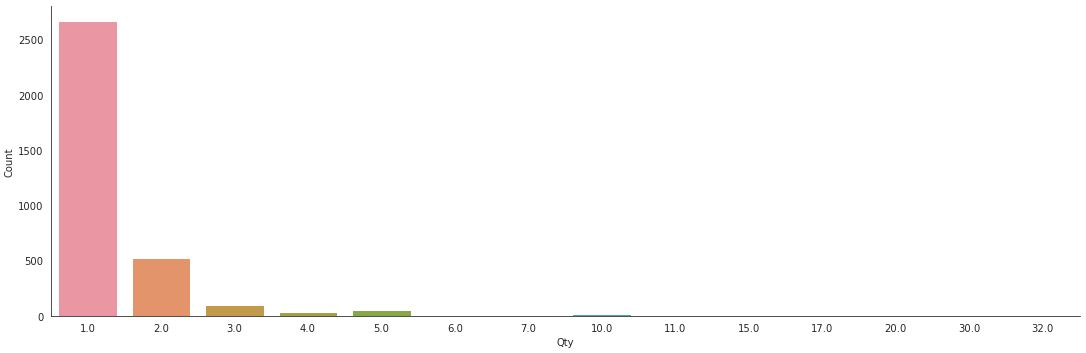

In [65]:
# Check the distribution of the quantity
with sns.axes_style('white'):
    g = sns.factorplot('Qty', data=df, aspect=3.0, kind='count')   
    g.set_ylabels('Count')

#### Almost all of the quantity value is 1

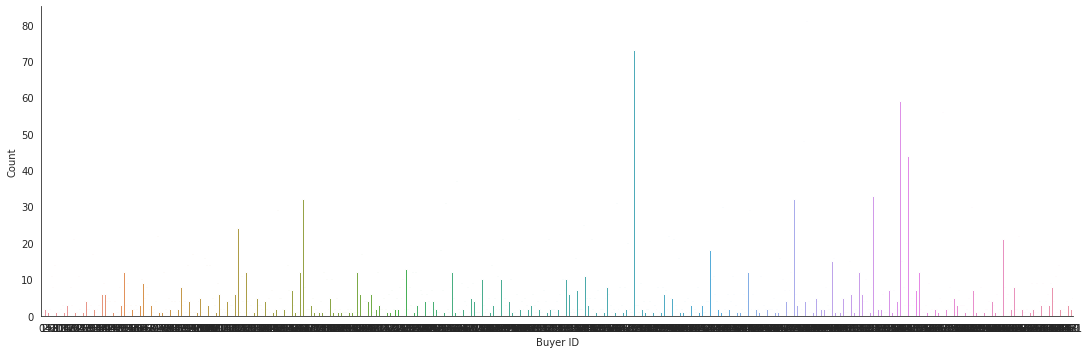

In [66]:
# Check the distribution of the Buyer id
with sns.axes_style('white'):
    g = sns.factorplot('Buyer ID', data=df, aspect=3.0, kind='count')   # x axis has 652 buyer ids 
    g.set_ylabels('Count')